In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
df=pd.read_csv(r"sign_landmarks.csv")

df = df[df["label"] != "NOTHING"].reset_index(drop=True)

df_limited = df.groupby("label").head(4000).reset_index(drop=True)


In [3]:
custom_label_order = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ") + ["SPACE", "DEL"]

le = LabelEncoder()
le.fit(custom_label_order)
# [a-z]- 0 to 25 and space-26,del-27

X = df_limited.drop("label", axis=1)
y = df_limited["label"]

y_encoded = le.transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [4]:
from tensorflow.keras.utils import to_categorical # type: ignore

# One-hot encode the labels
y_train_onehot = to_categorical(y_train, num_classes=len(custom_label_order))
y_test_onehot = to_categorical(y_test, num_classes=len(custom_label_order))


In [5]:
print(len(y_train_onehot[0]))
np.shape(X)

28


(109644, 63)

In [7]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Dropout # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore

In [ ]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(28, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train 
history = model.fit(
    X_train, y_train_onehot,
    validation_data=(X_test, y_test_onehot),
    epochs=30,
    batch_size=64,
    verbose=1
)

# 8. Evaluate
loss, accuracy = model.evaluate(X_test, y_test_onehot)
print(f"Test Accuracy: {accuracy*100:.2f}%")


c:\Users\psvma\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4190 - loss: 1.8887 - val_accuracy: 0.8506 - val_loss: 0.4423
Epoch 2/30
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8381 - loss: 0.4912 - val_accuracy: 0.9299 - val_loss: 0.2512
Epoch 3/30
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8789 - loss: 0.3767 - val_accuracy: 0.9233 - val_loss: 0.2375
Epoch 4/30
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8939 - loss: 0.3295 - val_accuracy: 0.9398 - val_loss: 0.1885
Epoch 5/30
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9049 - loss: 0.3013 - val_accuracy: 0.9421 - val_loss: 0.1972
Epoch 6/30
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9158 - loss: 0.2691 - val_accuracy: 0.9524 - val_loss: 0.1617
Epoch 7/30
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9207 - loss: 0.2544 - val_accuracy: 0.9602 - val_loss: 0.1332
Epoch 8/30
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9243 - loss: 0.2444 - 

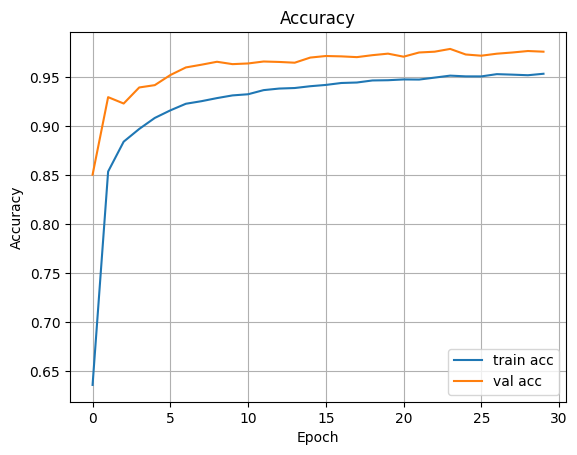

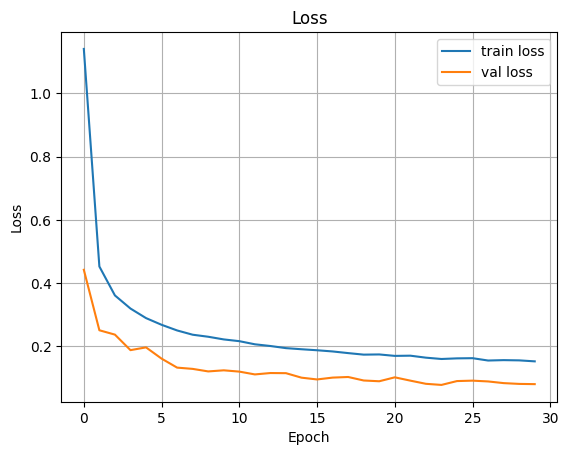

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, classification_report


In [11]:
from sklearn.metrics import classification_report
import numpy as np

# Get predicted probabilities (one-hot-like softmax output)
y_pred_probs = model.predict(X_test)

# Convert predictions and true labels from one-hot to class indices
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_onehot, axis=1)


686/686 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [12]:
# Print classification report
print(classification_report(
    y_true_labels,
    y_pred_labels,
    labels=range(len(le.classes_)),  # 0 to 27
    target_names=le.classes_       # ['A', ..., 'Z', 'SPACE', 'DEL']
))


              precision    recall  f1-score   support

           A       0.97      0.99      0.98       800
           B       1.00      1.00      1.00       800
           C       0.98      0.98      0.98       800
           D       1.00      0.95      0.98       800
         DEL       0.97      1.00      0.98       708
           E       0.99      0.98      0.99       800
           F       0.99      0.99      0.99       800
           G       0.98      1.00      0.99       800
           H       0.98      0.99      0.99       800
           I       0.98      0.98      0.98       800
           J       0.99      0.99      0.99       800
           K       0.98      0.99      0.99       800
           L       1.00      0.99      1.00       800
           M       0.90      0.86      0.88       735
           N       0.86      0.88      0.87       602
           O       0.96      0.98      0.97       800
           P       0.99      0.99      0.99       800
           Q       0.99    

In [ ]:
import joblib

joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']

In [ ]:
# Save the Keras model (Recommended format)
model.save("sign_model_static_mark2.h5")